# Project 3 Part 1 (Core)


## Business Problem 

For this project, you have been hired to produce a MySQL database on Movies from a subset of IMDB's publicly available dataset. Ultimately, you will use this database to analyze what makes a movie successful and will provide recommendations to the stakeholder on how to make a successful movie.



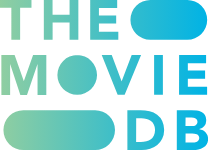


Over the course of this project, you will:

- Part 1: Download several files from IMDB’s movie data set and filter out the subset of moves requested by the stakeholder.
- Part 2: Use an API to extract box office revenue and profit data to add to your IMDB data and perform exploratory data analysis.
- Part 3: Construct and export a MySQL database using your data.
- Part 4: Apply hypothesis testing to explore what makes a movie successful.
- Part 5 (Optional): Produce a Linear Regression model to predict movie performance.

# The Data 


- IMDB Provides Several Files with varied information for Movies, TV Shows, Made for TV Movies, etc.
    - Overview/Data Dictionary: https://www.imdb.com/interfaces/
    - Downloads page: https://datasets.imdbws.com/

- From their previous research, they realized they want to focus on the following files:
 - title.basics.tsv.gz
 - title.ratings.tsv.gz
 - title.akas.tsv.gz

## Specifications

Your stakeholder only wants you to include information for movies based on the following specifications:

- Exclude any movie with missing values for genre or runtime
- Include only full-length movies (titleType = "movie").
- Include only fictional movies (not from documentary genre)
- Include only movies that were released 2000 - 2021 (include 2000 and 2021)
- Include only movies that were released in the United States

## Deliverable 

After filtering out movies that do not meet the stakeholder's specifications:

- Before saving, run a final .info() for each of the dataframes to show a summary of how many movies remain and the datatypes of each feature
- Save each file to a compressed csv file "Data/" folder inside your repository.
- Commit your changes to your repository in GitHub desktop and Publish repository / Push Changes.
- Submit the link to your repository

---

### Checking for Data Folders:

In [76]:
import os
os.makedirs('Data/',exist_ok=True) # Confirm folder created
os.listdir("Data/")

['.ipynb_checkpoints',
 'title-akas-us-only.csv',
 'title.basics.tsv.gz',
 'title.ratings.tsv.gz']

---


## Loading Data 

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [78]:
basics_url = 'https://datasets.imdbws.com/title.basics.tsv.gz'

In [79]:
ratings_url = 'https://datasets.imdbws.com/title.episode.tsv.gz'

In [80]:
akas = pd.read_csv('Data/title-akas-us-only.csv', low_memory = False)

In [81]:
basics = pd.read_csv(basics_url, sep='\t', low_memory = False)

In [82]:
ratings = pd.read_csv(ratings_url, sep ='\t', low_memory = False)

---

# Preprocessing - Data Cleaning

### AKAs

- keep only US movies.
- Replace "\N" with np.nan


In [83]:
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
1,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
2,tt0000005,10,Blacksmith Scene,US,\N,imdbDisplay,\N,0
3,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
4,tt0000005,6,Blacksmith Scene #1,US,\N,alternative,\N,0
...,...,...,...,...,...,...,...,...
1452559,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,\N,imdbDisplay,\N,0
1452560,tt9916620,1,The Copeland Case,US,\N,imdbDisplay,\N,0
1452561,tt9916702,1,Loving London: The Playground,US,\N,\N,\N,0
1452562,tt9916756,1,Pretty Pretty Black Girl,US,\N,imdbDisplay,\N,0


In [84]:
akas.replace({'\\N':np.nan}, inplace = True)
akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
1452559,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,NaN,imdbDisplay,NaN,0
1452560,tt9916620,1,The Copeland Case,US,NaN,imdbDisplay,NaN,0
1452561,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
1452562,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


In [85]:
region = akas['region'] == 'US'

In [86]:
filtered_akas = akas[region]
filtered_akas

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,6,Carmencita,US,NaN,imdbDisplay,NaN,0
1,tt0000002,7,The Clown and His Dogs,US,NaN,NaN,literal English title,0
2,tt0000005,10,Blacksmith Scene,US,NaN,imdbDisplay,NaN,0
3,tt0000005,1,Blacksmithing Scene,US,NaN,alternative,NaN,0
4,tt0000005,6,Blacksmith Scene #1,US,NaN,alternative,NaN,0
...,...,...,...,...,...,...,...,...
1452559,tt9916560,1,March of Dimes Presents: Once Upon a Dime,US,NaN,imdbDisplay,NaN,0
1452560,tt9916620,1,The Copeland Case,US,NaN,imdbDisplay,NaN,0
1452561,tt9916702,1,Loving London: The Playground,US,NaN,NaN,NaN,0
1452562,tt9916756,1,Pretty Pretty Black Girl,US,NaN,imdbDisplay,NaN,0


### Basics 

- Keep only US movies (Use AKAs table, see "Filtering one dataframe based on another" section below)
- Replace "\N" with np.nan
- Eliminate movies that are null for runtimeMinutes
- Eliminate movies that are null for genre
- keep only titleType==Movie
- Convert the startYear column to float data type.
- Filter the dataframe using startYear. Keep years between 2000-2021 (Including 2000 and 2021)
- Eliminate movies that include "Documentary" in the genre (see tip below).

In [87]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10106335,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family"
10106336,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
10106337,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
10106338,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [88]:
basics.replace({'\\N':np.nan}, inplace = True)
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,NaN,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
10106335,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,NaN,NaN,"Action,Drama,Family"
10106336,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,NaN,NaN,"Action,Drama,Family"
10106337,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,NaN,NaN,"Action,Drama,Family"
10106338,tt9916856,short,The Wind,The Wind,0,2015,NaN,27,Short


In [89]:
keepers = basics['tconst'].isin(filtered_akas['titleId'])
keepers

0            True
1            True
2           False
3           False
4            True
            ...  
10106335    False
10106336    False
10106337    False
10106338    False
10106339    False
Name: tconst, Length: 10106340, dtype: bool

In [90]:
basics = basics[keepers]
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NaN,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10106201,tt9916560,tvMovie,March of Dimes Presents: Once Upon a Dime,March of Dimes Presents: Once Upon a Dime,0,1963,NaN,58,Family
10106230,tt9916620,movie,The Copeland Case,The Copeland Case,0,NaN,NaN,NaN,Drama
10106268,tt9916702,short,Loving London: The Playground,Loving London: The Playground,0,NaN,NaN,NaN,"Drama,Short"
10106291,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0,2019,NaN,NaN,Short


In [91]:
basics = basics.dropna(subset=["runtimeMinutes", "genres"])


In [92]:
basics['runtimeMinutes'].isna().sum()


0

In [93]:
basics['genres'].isna().sum()

0

In [94]:
basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,NaN,5,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,NaN,1,"Short,Sport"
...,...,...,...,...,...,...,...,...,...
10106033,tt9916214,short,Drown the Clown,Drown the Clown,0,2019,NaN,8,"Drama,Short"
10106053,tt9916254,video,Big Tit Cream Pie 32,Big Tit Cream Pie 32,1,2015,NaN,226,Adult
10106099,tt9916348,video,Ancient World Exposed,Ancient World Exposed,0,2019,NaN,67,History
10106106,tt9916362,movie,Coven,Akelarre,0,2020,NaN,92,"Drama,History"


In [95]:
movies_filt = basics["titleType"] == 'movie'

In [96]:
basics_mov = basics[movies_filt]
basics_mov

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,NaN,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,NaN,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,NaN,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,NaN,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,NaN,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...
10105695,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019,NaN,70,Documentary
10105873,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019,NaN,97,"Comedy,Drama,Fantasy"
10106013,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,NaN,51,Drama
10106022,tt9916190,movie,Safeguard,Safeguard,0,2020,NaN,95,"Action,Adventure,Thriller"


In [97]:
basics_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203778 entries, 8 to 10106106
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          203778 non-null  object
 1   titleType       203778 non-null  object
 2   primaryTitle    203778 non-null  object
 3   originalTitle   203778 non-null  object
 4   isAdult         203778 non-null  object
 5   startYear       200251 non-null  object
 6   endYear         0 non-null       object
 7   runtimeMinutes  203778 non-null  object
 8   genres          203778 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [98]:
basics_mov.drop('endYear',axis = 1, inplace =True)

C:\Users\valma\AppData\Local\Temp\ipykernel_20348\519130084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics_mov.drop('endYear',axis = 1, inplace =True)


In [99]:
basics_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203778 entries, 8 to 10106106
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          203778 non-null  object
 1   titleType       203778 non-null  object
 2   primaryTitle    203778 non-null  object
 3   originalTitle   203778 non-null  object
 4   isAdult         203778 non-null  object
 5   startYear       200251 non-null  object
 6   runtimeMinutes  203778 non-null  object
 7   genres          203778 non-null  object
dtypes: object(8)
memory usage: 14.0+ MB


In [100]:
basics_mov

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
...,...,...,...,...,...,...,...,...
10105695,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019,70,Documentary
10105873,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019,97,"Comedy,Drama,Fantasy"
10106013,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,51,Drama
10106022,tt9916190,movie,Safeguard,Safeguard,0,2020,95,"Action,Adventure,Thriller"


In [101]:
basics2 = basics_mov[(basics_mov['startYear'] >= "2000") & (basics_mov['startYear'] <= "2021")]
basics2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34800,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,118,"Comedy,Fantasy,Romance"
61112,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,70,Drama
67486,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016,90,Drama
67664,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama
86791,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...
10105695,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019,70,Documentary
10105873,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019,97,"Comedy,Drama,Fantasy"
10106013,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,51,Drama
10106022,tt9916190,movie,Safeguard,Safeguard,0,2020,95,"Action,Adventure,Thriller"


In [102]:
basics2['startYear'] = basics2['startYear'].astype(float)


C:\Users\valma\AppData\Local\Temp\ipykernel_20348\1082901042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basics2['startYear'] = basics2['startYear'].astype(float)


In [103]:
basics2.dtypes

tconst             object
titleType          object
primaryTitle       object
originalTitle      object
isAdult            object
startYear         float64
runtimeMinutes     object
genres             object
dtype: object

In [104]:
basics3 = basics2['genres'].str.contains('documentary',case = False)
basics2 = basics2[~basics3]

In [105]:
basics2

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
34800,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,118,"Comedy,Fantasy,Romance"
61112,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,70,Drama
67486,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,90,Drama
67664,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,122,Drama
86791,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,100,"Comedy,Horror,Sci-Fi"
...,...,...,...,...,...,...,...,...
10105479,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019.0,74,Drama
10105873,tt9915872,movie,The Last White Witch,Boku no kanojo wa mahoutsukai,0,2019.0,97,"Comedy,Drama,Fantasy"
10106013,tt9916170,movie,The Rehearsal,O Ensaio,0,2019.0,51,Drama
10106022,tt9916190,movie,Safeguard,Safeguard,0,2020.0,95,"Action,Adventure,Thriller"


### Ratings

- Keep only movies that were included in your final title basics dataframe above.
- (Use AKAs table, see "Filtering one dataframe based on another" section below)
- Replace "\N" with np.nan (if any)

In [106]:
ratings

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,\N,\N
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7693907,tt9916846,tt1289683,3,18
7693908,tt9916848,tt1289683,3,17
7693909,tt9916850,tt1289683,3,19
7693910,tt9916852,tt1289683,3,20


In [107]:
ratings.replace({'\\N':np.nan}, inplace = True)
ratings

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
2,tt0042889,tt0989125,NaN,NaN
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
...,...,...,...,...
7693907,tt9916846,tt1289683,3,18
7693908,tt9916848,tt1289683,3,17
7693909,tt9916850,tt1289683,3,19
7693910,tt9916852,tt1289683,3,20


In [108]:
ratings = ratings.dropna(subset=["seasonNumber", "episodeNumber"])
ratings

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
1,tt0042816,tt0989125,1,17
3,tt0043426,tt0040051,3,42
4,tt0043631,tt0989125,2,16
5,tt0043693,tt0989125,2,8
...,...,...,...,...
7693907,tt9916846,tt1289683,3,18
7693908,tt9916848,tt1289683,3,17
7693909,tt9916850,tt1289683,3,19
7693910,tt9916852,tt1289683,3,20


In [109]:
ratings_fil = ratings['tconst'].isin(filtered_akas['titleId'])
ratings_fil

0           True
1          False
3           True
4          False
5          False
           ...  
7693907    False
7693908    False
7693909    False
7693910    False
7693911    False
Name: tconst, Length: 6121712, dtype: bool

In [110]:
ratings = ratings[ratings_fil]
ratings

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0041951,tt0041038,1,9
3,tt0043426,tt0040051,3,42
7,tt0044093,tt0959862,1,6
8,tt0044668,tt0044243,2,16
11,tt0045960,tt0044284,2,3
...,...,...,...,...
7693058,tt9914556,tt8418084,2,3
7693134,tt9914760,tt0949793,19,15
7693249,tt9915128,tt9548722,1,2
7693641,tt9916200,tt3501074,5,19


### Before saving, run a final .info() for each of the dataframes to show a summary of how many movies remain and the datatypes of each feature

In [111]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222234 entries, 0 to 7693642
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         222234 non-null  object
 1   parentTconst   222234 non-null  object
 2   seasonNumber   222234 non-null  object
 3   episodeNumber  222234 non-null  object
dtypes: object(4)
memory usage: 8.5+ MB


In [112]:
basics2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81890 entries, 34800 to 10106106
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          81890 non-null  object 
 1   titleType       81890 non-null  object 
 2   primaryTitle    81890 non-null  object 
 3   originalTitle   81890 non-null  object 
 4   isAdult         81890 non-null  object 
 5   startYear       81890 non-null  float64
 6   runtimeMinutes  81890 non-null  object 
 7   genres          81890 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.6+ MB


In [113]:
filtered_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452564 entries, 0 to 1452563
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1452564 non-null  object
 1   ordering         1452564 non-null  int64 
 2   title            1452564 non-null  object
 3   region           1452564 non-null  object
 4   language         4018 non-null     object
 5   types            981678 non-null   object
 6   attributes       47016 non-null    object
 7   isOriginalTitle  1451222 non-null  object
dtypes: int64(1), object(7)
memory usage: 99.7+ MB
